~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                  Results of Lok Sabha Elections                   
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


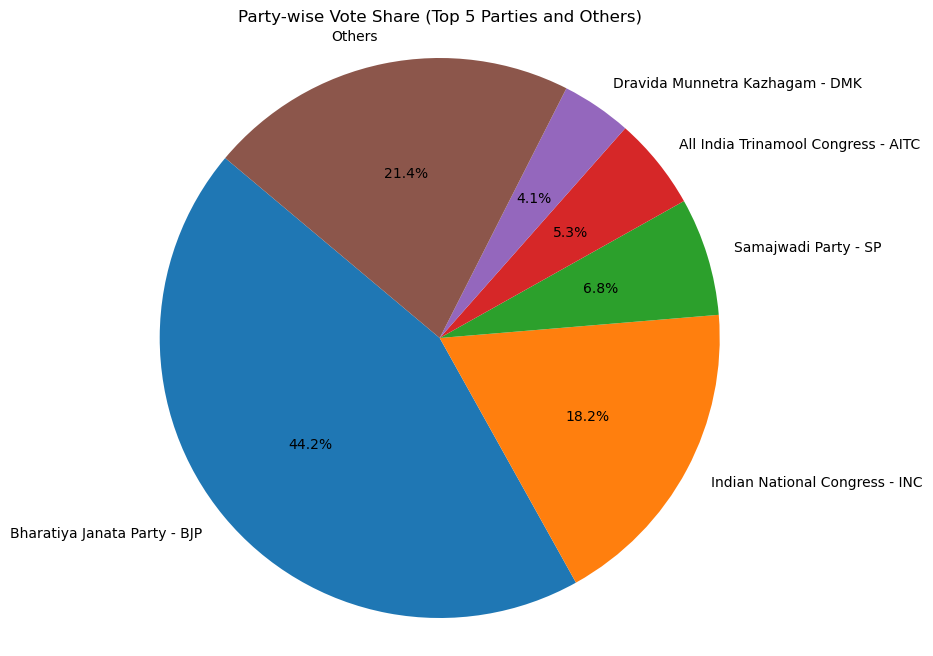

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 28 19:39:58 2024

@author: vruti
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("                  Results of Lok Sabha Elections                   ") 
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Example: Find tables with election results
tables = soup.find_all('table')

#Extract headers
headers = soup.find_all('th')[0:4]
headers = [ele.text.strip() for ele in headers]

# Extract data into a DataFrame
data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)
df = pd.DataFrame(data, columns=headers)
df.to_csv(r'C:\Users\srini\Downloads\DSA\lok_sabha_results.csv', index=False)

df = pd.read_csv(r'C:\Users\srini\Downloads\DSA\lok_sabha_results.csv')
df.dropna(inplace=True)
df.columns = df.columns.str.strip()

# Ensure the DataFrame has 'Party' and 'Won' columns
if 'Party' in df.columns and 'Won' in df.columns:
    # Convert 'Won' column to numeric
    df['Won'] = pd.to_numeric(df['Won'])
    
    # Sort by 'Won' in descending order and get top 5 parties
    top_parties = df.sort_values(by='Won', ascending=False).head(5)
    
    # Calculate the 'Others' category
    others = pd.DataFrame([['Others', df['Won'].sum() - top_parties['Won'].sum()]], columns=['Party', 'Won'])
    
    # Combine top 5 parties with 'Others'
    combined = pd.concat([top_parties, others])
    
    # Plot pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(combined['Won'], labels=combined['Party'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Party-wise Vote Share (Top 5 Parties and Others)')
    plt.show()
else:
    print("Required columns 'Party' and 'Won' are not present in the DataFrame")



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                  Results of Lok Sabha Elections                   
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


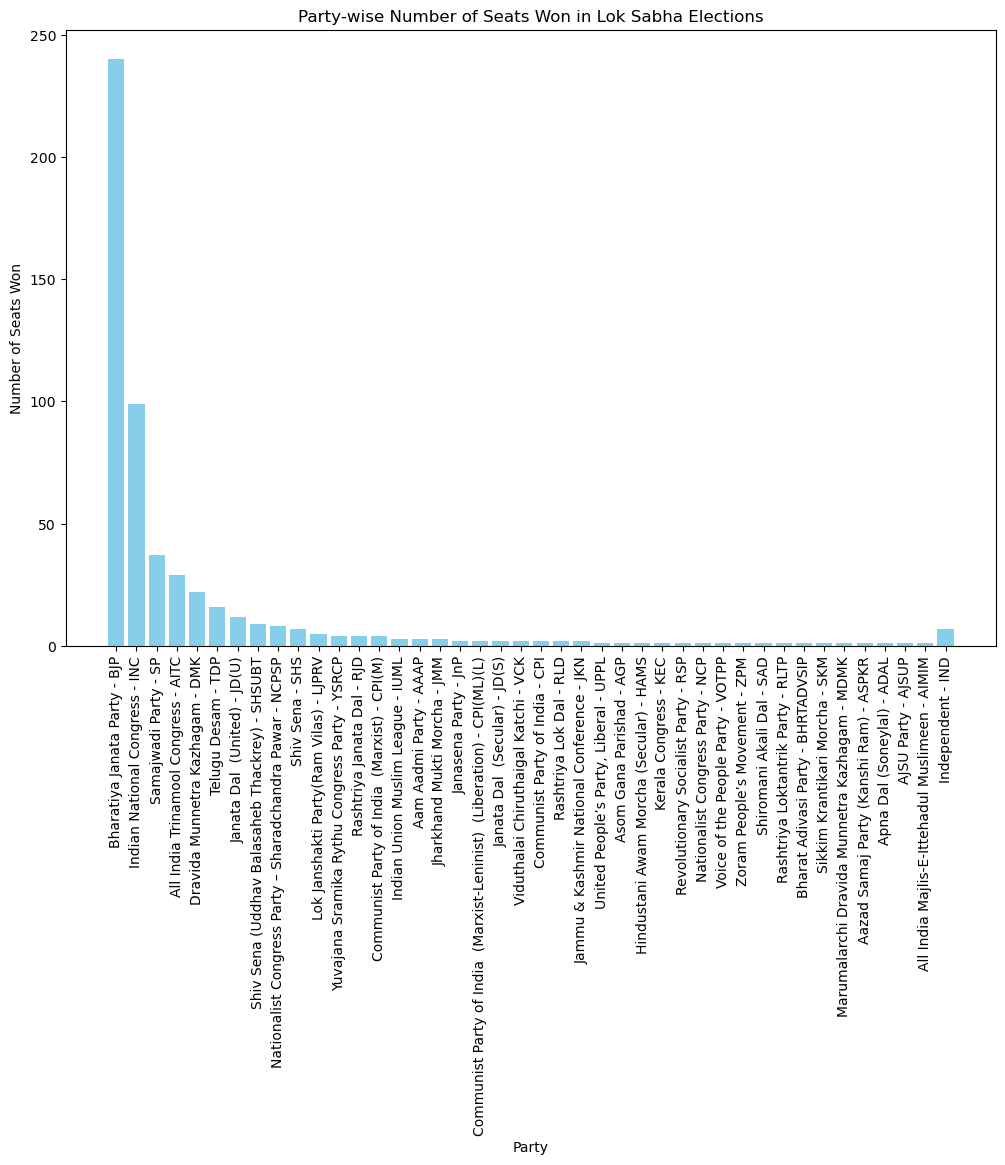

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 28 19:39:58 2024

@author: vruti
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("                  Results of Lok Sabha Elections                   ") 
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Example: Find tables with election results
tables = soup.find_all('table')

#Extract headers
headers = soup.find_all('th')[0:4]
headers = [ele.text.strip() for ele in headers]

# Extract data into a DataFrame
data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)
df = pd.DataFrame(data, columns=headers)
df.to_csv(r'C:\Users\srini\Downloads\DSA\lok_sabha_results.csv', index=False)

df = pd.read_csv(r'C:\Users\srini\Downloads\DSA\lok_sabha_results.csv')
df.dropna(inplace=True)
df.columns = df.columns.str.strip()

# Ensure the DataFrame has 'Party' and 'Won' columns
if 'Party' in df.columns and 'Won' in df.columns:
    # Plot bar chart of party-wise vote share
    plt.figure(figsize=(12, 8))
    plt.bar(df['Party'], df['Won'], color='skyblue')
    plt.xlabel('Party')
    plt.ylabel('Number of Seats Won')
    plt.title('Party-wise Number of Seats Won in Lok Sabha Elections')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Required columns 'Party' and 'Won' are not present in the DataFrame")
